In [2]:
# load tool

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Student\AppData\Local\Temp\ipykernel_17372\2370650137.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [4]:
df_2 = pd.read_csv("apple_quality.csv")

In [5]:
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [6]:
df_2= df_2.replace(to_replace="good", value = 1)

In [7]:
df_2=df_2.replace(to_replace="bad", value = 0)

C:\Users\Student\AppData\Local\Temp\ipykernel_17372\3694806182.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2=df_2.replace(to_replace="bad", value = 0)


In [8]:
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [9]:
df_2=df_2.drop(4000)
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0.0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0


In [10]:
# split data into X and y
X_1 = df_2.drop("Quality",axis=1)
y_1= df_2["Quality"]

* split into training and testing

In [11]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [12]:
knn_1 = KNeighborsClassifier()

In [35]:
kNumber = range(1,21)
train_scores=[]
test_scores=[]
# loop through different n neighbours
for i in kNumber:
    knn_1.set_params(n_neighbors=i, weights = 'uniform')
    knn_1.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(knn_1.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(knn_1.score(X1_test,y1_test))
    

In [36]:
train_scores

[1.0,
 0.7765625,
 0.79,
 0.724375,
 0.7359375,
 0.6959375,
 0.69125,
 0.66875,
 0.6696875,
 0.6459375,
 0.6396875,
 0.6215625,
 0.6240625,
 0.616875,
 0.6178125,
 0.60875,
 0.610625,
 0.59875,
 0.6015625,
 0.59875]

Max KNN score on the test data: 59.62%


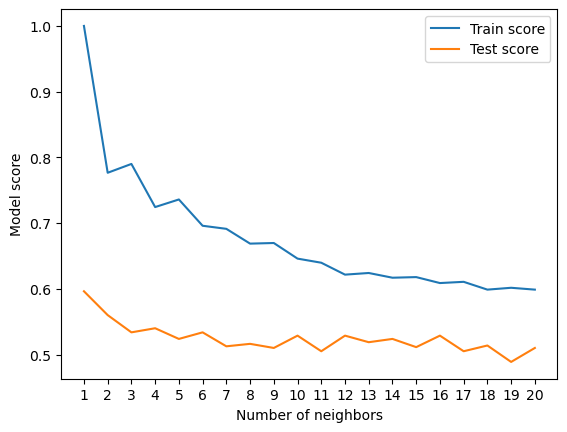

In [37]:
plt.plot(kNumber, train_scores, label="Train score")
plt.plot(kNumber, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))

plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

In [16]:
# weight = distance
train_scores_distance=[]
test_scores_distance=[]
knn_1_distance = KNeighborsClassifier()
# loop through different n neighbours
for i in kNumber:
    knn_1_distance.set_params(n_neighbors=i, weights = 'distance')
    knn_1_distance.fit(X1_train,y1_train)
    # update the training scores list
    train_scores_distance.append(knn_1.score(X1_train,y1_train))
    #update the test scores list
    test_scores_distance.append(knn_1.score(X1_test,y1_test))

Max KNN score on the test data: 59.62%


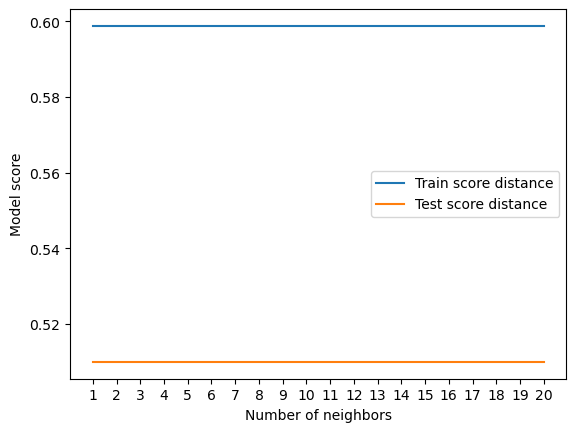

In [17]:
plt.plot(kNumber, train_scores_distance, label="Train score distance")
plt.plot(kNumber, test_scores_distance, label="Test score distance")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

In [18]:

f1_train_scores=[]
f1_test_scores=[]
# loop through different n neighbours
for i in kNumber:
    knn_1.set_params(n_neighbors=i, weights = 'uniform')
    knn_1.fit(X1_train,y1_train)
    y1_train_pred = knn_1.predict(X1_train)
    y1_test_pred = knn_1.predict(X1_test)
    # update the training scores list
    f1_train_scores.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores.append(f1_score(y1_test,y1_test_pred))
    
    

Max KNN score on the test data: 59.62%


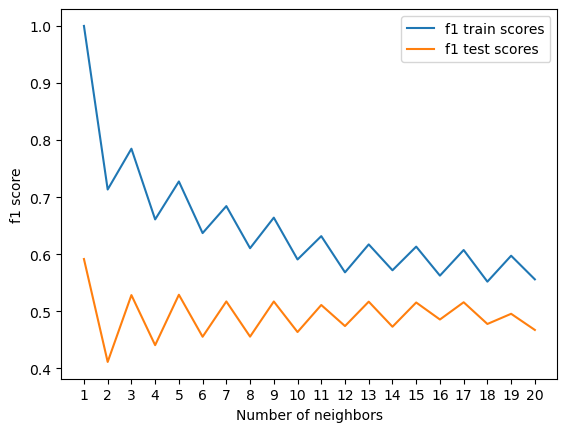

In [19]:
plt.plot(kNumber, f1_train_scores, label="f1 train scores")
plt.plot(kNumber, f1_test_scores, label="f1 test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("f1 score")
plt.legend()

print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

In [20]:
from sklearn.model_selection import learning_curve, validation_curve

In [26]:
knn_best = KNeighborsClassifier(n_neighbors=1, weights = 'uniform')

In [27]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=knn_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

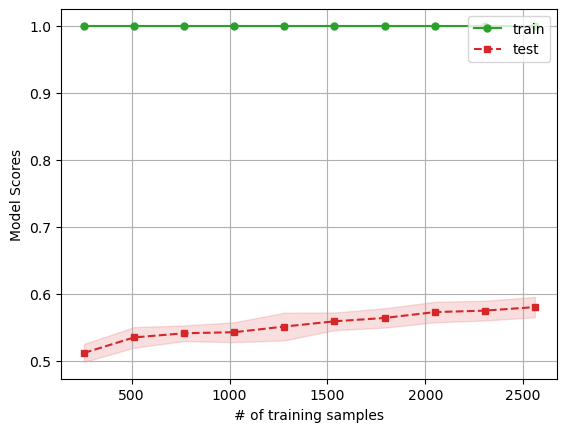

In [28]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='upper right')
plt.show()

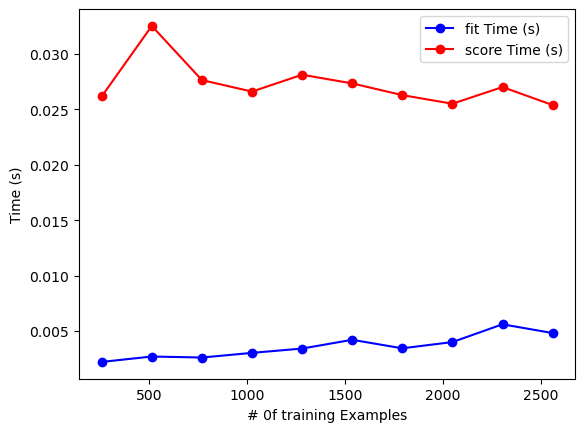

In [29]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
# plt.fill_between(train_sizes, fit_time_mean - 2*fit_time_std, fit_time_mean + 2*fit_time_std, alpha=0.1, color="b")
# plt.fill_between(train_sizes, score_time_mean - 2*score_time_std, score_time_mean + 2*score_time_std, alpha=0.1, color="r")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()